In [1]:
%matplotlib widget
# %matplotlib ipympl

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
from statistics import mean

import util.benchmark as benchmark
import util.plotting as plotting

# Range Queries 1D

In [2]:
N = 3000
ITS = 100
Ns = list(range(1,N+1, int(N/ITS)))
prefixSum1DCases = [([e for e in range(i)],[(0,e) for e in range(i)]) for i in Ns]

# Naive 1D

In [3]:
def solveRangeQueries(elems, queries):
    res = []
    for (left, right) in queries:
        s = 0
        for i in range(left, right+1):
            s += elems[i]

        res.append(s)

    return res

## Ejemplo

In [4]:
print(solveRangeQueries([1,2,3,4,5,6,7,8,9,10], [(0,4),(4,8),(7,9), (1,5)]))

[15, 35, 27, 20]


## Complejidad

In [5]:
naive1DResults = benchmark.benchmarkFuncForCases(1, solveRangeQueries, prefixSum1DCases, copyCase = False)

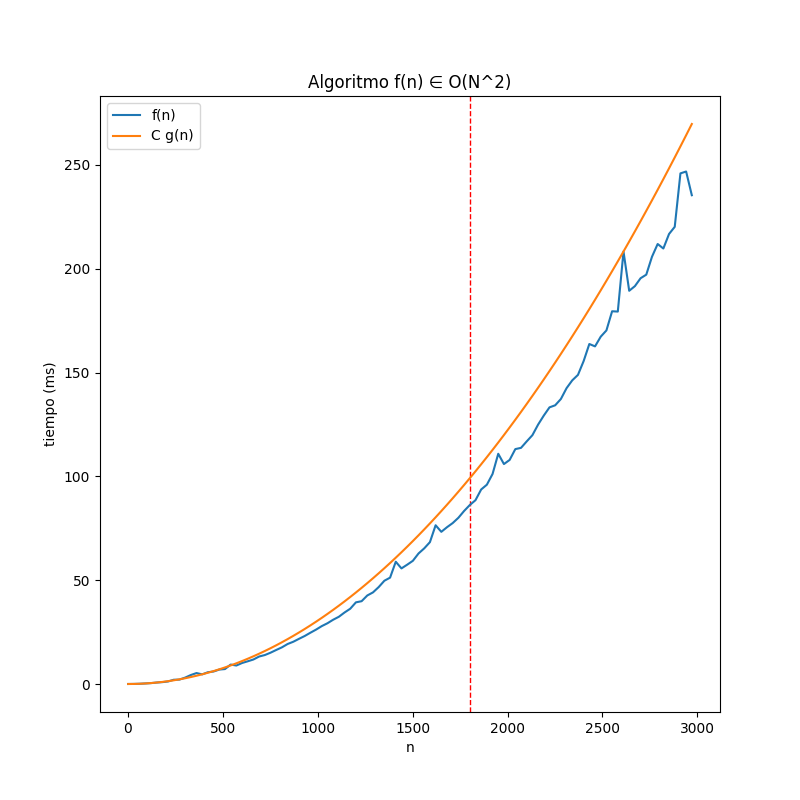

In [6]:
on2 = lambda elems, queries: len(elems)*len(queries)

plotting.plotFuncBigOAnalysis(Ns, prefixSum1DCases, naive1DResults, "N^2", on2, 60)

# Prefix Sum 1D

In [7]:
def solveRangeQueries(elems, queries):
    pSum = [0 for _ in range(len(elems)+1)]
    for i in range(len(elems)):
        pSum[i+1] = pSum[i] + elems[i]

    res = []
    for (left, right) in queries:
        res.append(pSum[right+1] - pSum[left])

    return res

## Ejemplo

In [8]:
print(solveRangeQueries([1,2,3,4,5,6,7,8,9,10], [(0,4),(4,8),(7,9), (1,5)]))

[15, 35, 27, 20]


## Complejidad

In [9]:
prefixSum1DResults = benchmark.benchmarkFuncForCases(1, solveRangeQueries, prefixSum1DCases, copyCase = False)

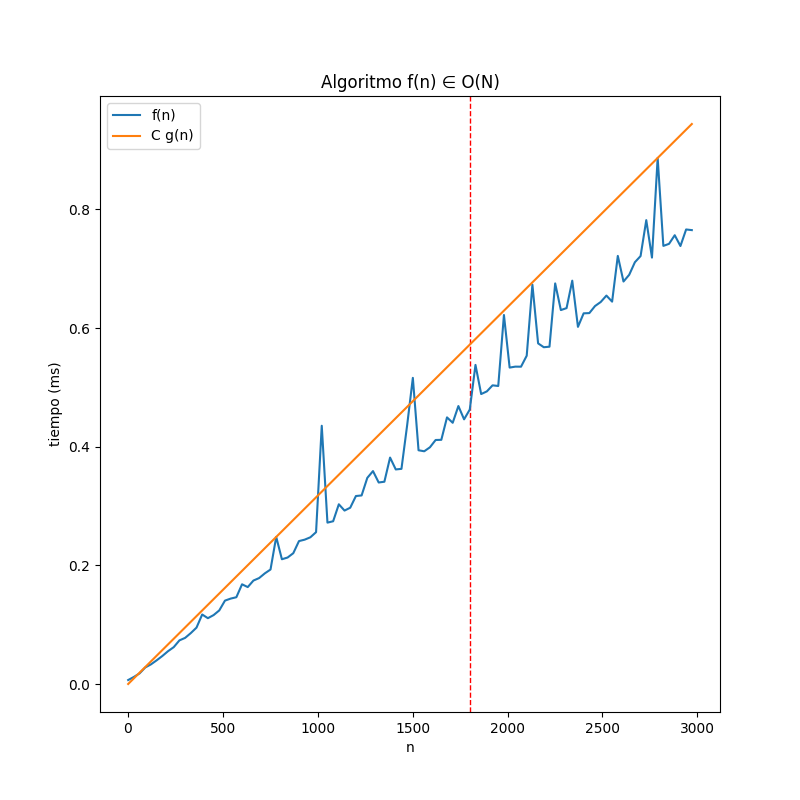

In [10]:
on = lambda elems, queries: len(elems) + len(queries)

plotting.plotFuncBigOAnalysis(Ns, prefixSum1DCases, prefixSum1DResults, "N", on, 60)

# Range Queries 2D

In [11]:
N = 100
ITS = 100
Ns = list(range(1,N+1, int(N/ITS)))
prefixSum2DCases = [([[i*n+j for j in range(n)] for i in range(n)],[((0,0),(i,j)) for j in range(n) for i in range(n)]) for n in Ns]

## Naive 2D

In [12]:
def solveRangeQueries(elems, queries):
    res = []
    for ((tly,tlx), (bry,brx)) in queries:
        s = 0
        for i in range(tly, bry+1):
            for j in range(tlx, brx+1):
                s += elems[i][j]

        res.append(s)

    return res

## Ejemplo

In [13]:
print(solveRangeQueries([[1,2,3],[4,5,6],[7,8,9]], [((1,1),(2,2))]))

[28]


## Complejidad

In [14]:
naive2DResults = benchmark.benchmarkFuncForCases(1, solveRangeQueries, prefixSum2DCases, copyCase = False)

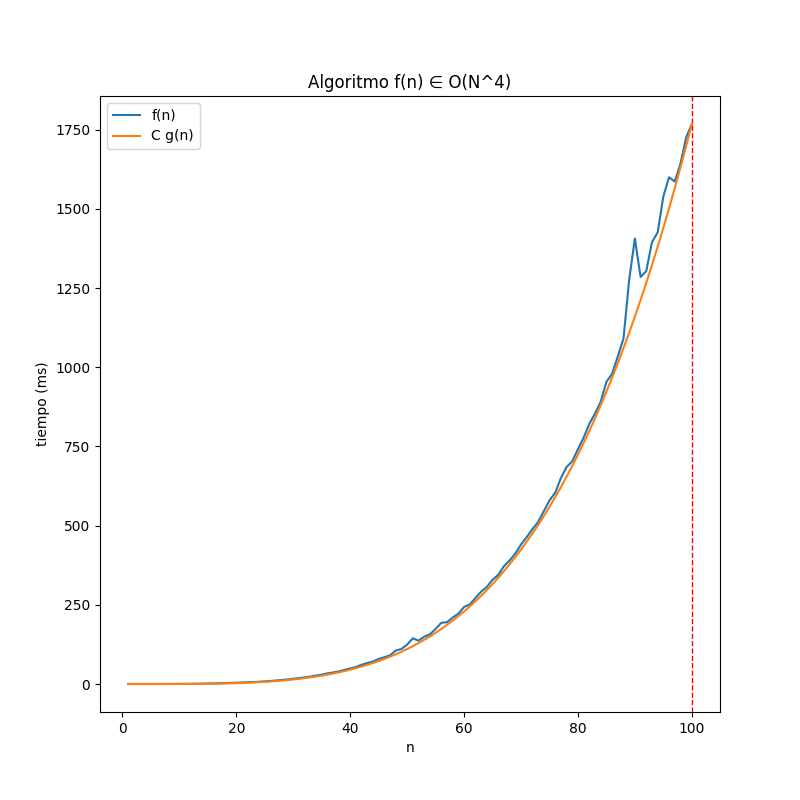

In [15]:
on3 = lambda elems, queries: len(elems)*len(elems[0])*len(queries)

plotting.plotFuncBigOAnalysis(Ns, prefixSum2DCases, naive2DResults, "N^4", on3, 99)

## Prefix Sum 2D

In [16]:
def solveRangeQueries(elems, queries):
    prefixMatrix = [[0 for j in range(len(elems[0])+1)] for i in range(len(elems)+1)]
    for i in range(1,len(elems)+1):
        prefixMatrix[i] = [0 for _ in range(len(elems[i-1])+1)]
    
    for i in range(1,len(elems)+1):
        for j in range(1,len(elems[i-1])+1):
            prefixMatrix[i][j] = prefixMatrix[i-1][j]+ prefixMatrix[i][j-1]- prefixMatrix[i-1][j-1]+ elems[i-1][j-1]
    
    res = []
    for ((topLeftY,topLeftX),(bottomRightY,bottomRightX)) in queries:
        res.append(prefixMatrix[bottomRightY+1][bottomRightX+1] - prefixMatrix[bottomRightY+1][topLeftX] - prefixMatrix[topLeftY][bottomRightX+1] + prefixMatrix[topLeftY][topLeftX])


    return res

## Ejemplo

In [17]:
print(solveRangeQueries([[1,2,3],[4,5,6],[7,8,9]], [((1,1),(2,2))]))

[28]


## Complejidad

In [18]:
prefixSum2DResults = benchmark.benchmarkFuncForCases(1, solveRangeQueries, prefixSum2DCases, copyCase = False)

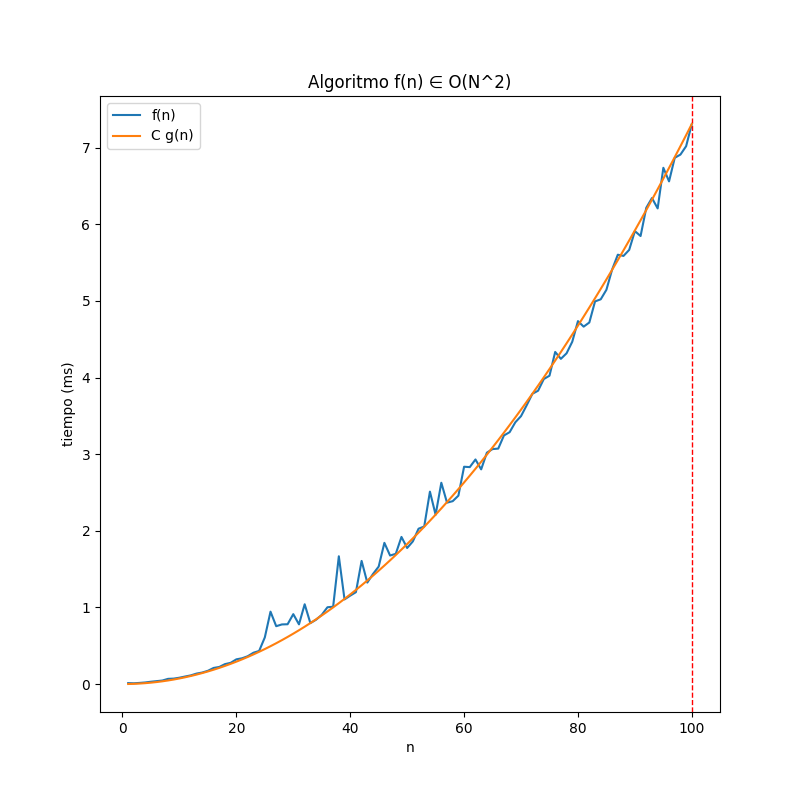

In [19]:
on2 = lambda elems, queries: len(elems)*len(elems[0])  + len(queries)

plotting.plotFuncBigOAnalysis(Ns, prefixSum2DCases, prefixSum2DResults, "N^2", on2, 99)